## ElasticNet: Una técnica intermedia:
- Hasta el momento hemos podido ver dos técnicas de regularización en las cuales añadimos un componente de penalización en el proceso donde encontramos los valores de los parámetros 𝛽 minimizando la función de error.

- Por ejemplo, si usamos el método de Mínimos Cuadrados Ordinarios, tenemos por definición nuestra función definida como:

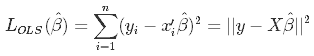

- Ahora bien. Si aplicamos la regularización L1 también conocida como Lasso (Least Absolute Shrinkage and Selection Operator), tenemos una ecuación de la forma:

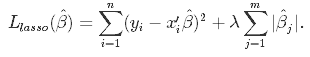

donde tenemos un parámetro de ajuste llamado ƛ que si tiene valores altos para el problema mandará el valor de 𝛽j a 0.

- Por otro lado. Si aplicamos la regularización L2 también conocida como Ridge, tendremos la siguiente ecuación:

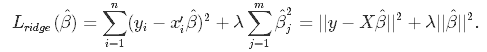

- Tendremos una penalización también pero que no tiene la posibilidad de llevar los valores de los coeficientes a cero. Sin embargo esto nos permitirá realizar el intercambio de +sesgo por -varianza.

## Recordando que :

- Ninguna de las dos es mejor que la otra para todos los casos.

- Lasso envía algunos coeficientes a cero permitiendo así seleccionar variables significativas para el modelo.

- Lasso funciona mejor si tenemos pocos predictores que influyen sobre el modelo.

- Ridge funciona mejor si es el caso contrario y tenemos una gran cantidad.

Para aplicarlos y decidir cuál es el mejor en la práctica, podemos probar usando alguna técnica como cross-validation iterativamente. o bien, podemos combinarlos…

## Regularización ElasticNet

- Es común encontrarnos en la literatura con un camino intermedio llamado ElasticNet. Esta técnica consiste en combinar las dos penalizaciones anteriores en una sola función. Así, nuestra ecuación de optimización quedará:

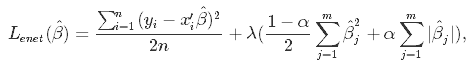

Donde tenemos ahora un parámetro adicional 𝛂 que tiene un rango de valores entre 0 y 1. Si 𝛂 = 0 , ElasticNet se comportará como Ridge, y si 𝛂 = 1 , se comportará como Lasso. Por lo tanto, nos brinda todo el espectro lineal de posibles combinaciones entre estos dos extremos.

Tenemos una forma de probar ambas L1 y L2 al tiempo sin perder información.

Supera las limitaciones individuales de ellas.

Si hace falta experiencia, o el conocimiento matemático de fondo, puede ser la opción preferente para probar la regularización.

'''ElasticNet con Scikit-learn

Para implementar esta técnica añadimos primero el algoritmo ubicado en el módulo linear_model.

from sklearn.linear_model import ElasticNet

Y luego simplemente lo inicializamos con el constructor ElasticNet() y entrenamos con la función fit().

regr = ElasticNet(random_state=0)

regr.fit(X, y)'''

ElasticNet Loss: 0.006499475630064783
Lasso Loss: 0.010312766264690335
Ridge Loss: 0.029278438946391875


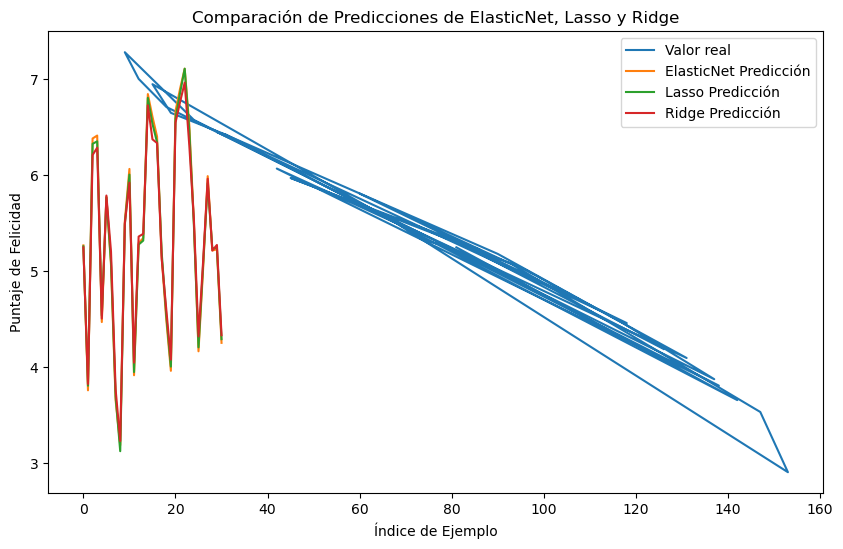

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos
data = pd.read_csv('/home/jhonfypy/CursoML_Scikit_learni_jf/felicidad.csv')

# Codificación one-hot para la columna 'country'
data = pd.get_dummies(data, columns=['country'], drop_first=True)

# Separar características y etiquetas
X = data.drop(columns=['score'])
y = data['score']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de características (opcional, pero recomendada)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar modelos
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controla la mezcla L1/L2
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)

# Entrenar modelos
elastic_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)

# Predecir valores
y_pred_elastic = elastic_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calcular pérdida
elastic_loss = mean_squared_error(y_test, y_pred_elastic)
lasso_loss = mean_squared_error(y_test, y_pred_lasso)
ridge_loss = mean_squared_error(y_test, y_pred_ridge)

print(f'ElasticNet Loss: {elastic_loss}')
print(f'Lasso Loss: {lasso_loss}')
print(f'Ridge Loss: {ridge_loss}')

# Crear gráfico de resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor real')
plt.plot(y_pred_elastic, label='ElasticNet Predicción')
plt.plot(y_pred_lasso, label='Lasso Predicción')
plt.plot(y_pred_ridge, label='Ridge Predicción')
plt.legend()
plt.title('Comparación de Predicciones de ElasticNet, Lasso y Ridge')
plt.xlabel('Índice de Ejemplo')
plt.ylabel('Puntaje de Felicidad')
plt.show()

/home/jhonfypy/anaconda3/envs/Scikit-learni-envjf/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/jhonfypy/anaconda3/envs/Scikit-learni-envjf/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


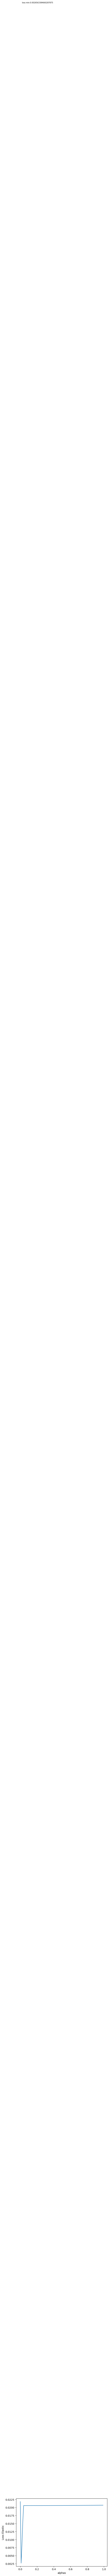

In [3]:
# elasticnet model
    
import numpy as np


def modelElastic(alpha=1):
    modelElastic= ElasticNet(random_state=0, alpha=alpha)
    modelElastic.fit(X_train, y_train)
    y_predic_elastic=modelElastic.predict(X_test)
    # loss function
    elastic_loss = mean_squared_error(y_test, y_predic_elastic)
    return elastic_loss

alphas = np.arange(0,1,0.01)
loss_total = []
for i in alphas:
    res = modelElastic(i)
    loss_total.append(res)

loss_total = np.array(loss_total)
plt.plot(alphas, loss_total)
plt.xlabel('alphas')
plt.ylabel('Loss Elastic')
plt.text(0.02, 0.8, 'loss min:{}'.format(np.min(loss_total)), fontsize=7)
plt.show()

